<a href="https://colab.research.google.com/github/Pataweepr/applyML_vistec_2019/blob/ekapolc-edits/hw2_homeDotTech_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Home dot tech 

ข้อมูลนี้เป็นข้อมูลเกี่ยวกับ ที่อยู่ในประเทศไทย 

พวกเราจะใช้ file จาก google drive ซึ่งต้องใช้ pyDrive


สามารถ อ่านการใช้งาน pydrive เบื้องต้นได้ตามนี้ 

[example pyDrive](https://github.com/Pataweepr/applyML_vistec_2019/blob/master/howToLoadDataWPyDrive.ipynb)

[link download file](https://drive.google.com/file/d/1X-cacRIF30acXyKotSmDZu5qc8Gs84Wm/view?usp=sharing)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
!unzip '/content/gdrive/My Drive/For_participants.zip'
!ls

Archive:  /content/gdrive/My Drive/For_participants.zip
replace project_facility.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: project_facility.csv    
  inflating: project_main.csv        
  inflating: userLog_201801_201802_for_participants.csv  
adc.json  project_facility.csv	sample_data
gdrive	  project_main.csv	userLog_201801_201802_for_participants.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mode

we use "delimiter= ';' " to split colums

In [0]:
def readDataFromDrive(file_name):
  raw_data = pd.read_csv(file_name,delimiter= ';')
  return raw_data;

files that we use in this exercise

* userLog  :  มันการเป็นเก็บ log ของ user ทั้งหมดที่เข้ามาในระบบ ว่า user เข้าผ่านอุปกรณื อะไรบ้างแล้วเข้าไปดูโปรเจคไหน
* project_main : เป็นการบอกรายละเอียดแต่ละ project ว่ามีข้อมูลอะไรบ้าง เกี่ยวกับตำแหน่ง หรือ ตัวของ ราคา
* project_facility : บอก facility ของแต่ละโปรคเจคว่าเป็นอย่างไร





# TODO#1: เปลี่ยนข้อมูลเป็นตัวเลข

ข้อมูบบที่เราจะพิจารณาต่อไปนี้เป็นข้อมูล

In [5]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
print('project_main')
project_main = readDataFromDrive('project_main.csv')
project_main = project_main.loc[project_main['province_id'] == 10]
print(project_main.shape)
project_main = project_main.drop(columns=['project_land_size_ngan', 'project_land_size_wa'])
project_main.loc[project_main["project_status"] == "A", "project_status"] = 1
project_main.loc[project_main["project_status"] == "U", "project_status"] = 0
project_main = project_main.convert_objects(convert_numeric=True)
project_main.head()

project_main
(1775, 18)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,project_land_size_rai,total_unit,percent_car_parking,starting_price,highest_price,project_status,created_at
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,54,NaN,NaN,3500000.0,3862000.0,1.0,2011-01-14T18:40:12.117+0700
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,154,NaN,NaN,4590000.0,NaN,0.0,2011-02-24T21:43:59.297+0700
7,208,13323,NaN,ลิฟวิ่งนารา รามคำแหง-สุวรรณภูมิ,LIVING NARA RAMKHAMHAENG-SUVARNABHUMI,1011.0,10,13.769810,100.722040,44,201.0,NaN,3500000.0,7600000.0,0.0,2010-07-02T07:00:00.000+0700
8,228,6772,0.0,เค.ซี.รามอินทรา 5 (พระยาสุเรนทร์),K.C. RAMINTRA 5,1046.0,10,13.862623,100.695135,34,NaN,NaN,1810000.0,NaN,0.0,2010-12-16T18:51:42.173+0700
11,982,12136,979.0,อนาวิลล์ สุวรรณภูมิ,Anaville Suvarnabhumi,1011.0,10,13.763348,100.803434,131,NaN,NaN,4300000.0,NaN,1.0,2011-01-17T22:55:47.317+0700


<details>
    <summary>SOLUTION HERE!</summary>
      <pre>
        <code>
print('project_main')
project_main = readDataFromDrive('project_main.csv')
project_main = project_main.loc[project_main['province_id'] == 10]
print(project_main.shape)
project_main = project_main.drop(columns=['project_land_size_ngan', 'project_land_size_wa'])
project_main.loc[project_main["project_status"] == "A", "project_status"] = 1
project_main.loc[project_main["project_status"] == "U", "project_status"] = 0
project_main = project_main.convert_objects(convert_numeric=True)
project_main.head()
        </code>
      </pre>
</details>



# TODO#2: แก้ไขข้อมูล data frame ของ projet_main ให้ไม่มี NAN

In [0]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
project_main = project_main.dropna(subset=['lat','lon'])
project_main["starting_price"] = project_main["starting_price"].fillna(project_main["starting_price"].mode().iloc[0])

<details>
    <summary>SOLUTION HERE!</summary>
      <pre>
        <code>
project_main = project_main.dropna(subset=['lat','lon'])
project_main["starting_price"] = project_main["starting_price"].fillna(project_main["starting_price"].mode().iloc[0])
        </code>
      </pre>
</details>

## TODO#3: load ข้อมูล facility
ลอง print ข้อมูลดูเราจะเห็นว่าข้อมูล และอธิบายว่าเหมาะสมกับการใช้หรือไม่


In [8]:
# project_facility  
project_facility = readDataFromDrive('project_facility.csv')
project_facility.head()

,project_id,facility_id
0,4,1
1,4,3
2,4,4
3,4,5
4,45,2



## TODO#4: แปลงข้อมูล fac ให้เหมาะแก้การใช้งาน 
เนื่องจากข้อมูลไม่ได้เป็นรูปแบบของตารางที่ใช้ได้ง่าย [pd.crosstab](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html) เพราะ เราต้องการตารางที่บอกถึง facility ว่ามีหรือไม่ในทุกแบบของ facility

In [9]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
project_facility_table = pd.crosstab(project_facility['project_id'], project_facility['facility_id'], rownames=['project_id'], colnames=['facility_id'])
print(project_facility_table.index)
project_facility_table.head()

Int64Index([   4,   24,   29,   41,   44,   45,   73,   95,  115,  133,
            ...
            9522, 9524, 9525, 9526, 9527, 9531, 9532, 9534, 9536, 9541],
           dtype='int64', name='project_id', length=5039)


facility_id,1,2,3,4,5,6
project_id,,,,,,
4,1,0,1,1,1,0
24,0,0,1,1,0,1
29,0,0,0,0,1,0
41,1,1,0,1,0,1
44,1,0,1,0,0,0


<details>
    <summary>SOLUTION HERE!</summary>
      <pre>
        <code>
project_facility_table = pd.crosstab(project_facility['project_id'], project_facility['facility_id'], rownames=['project_id'], colnames=['facility_id'])
print(project_facility_table.index)
project_facility_table.head()
        </code>
      </pre>
</details>

## TODO#5: กำจัดข้อมูลที่ใช้ไม่ได้ ออกไป เลือกใช้แต่ข้อมูลที่ครบ

เราจำเป็นต้องแยกข้อมูลให้เหลือ project ที่มีข้อมูลครบ เท่านั้น  เราสามารถใช้ [pandas.DataFrame.isin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) เพื่อช่วยในการหา วา่มีข้อมูลร่วมกันได้ในการแยกข้แมูลออกมา

In [10]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
project_facility_table = project_facility_table.loc[project_facility_table.index.isin(project_main['project_id'])]
project_main = project_main.loc[project_main['project_id'].isin(project_facility_table.index.astype(int))]
project_main = project_main.sort_values('project_id')
print(project_facility_table.shape)
print(project_main.shape)
project_facility_table.head()

(1697, 6)
(1697, 16)


facility_id,1,2,3,4,5,6
project_id,,,,,,
24,0,0,1,1,0,1
44,1,0,1,0,0,0
45,0,1,1,1,1,0
95,1,0,0,0,0,0
133,1,0,1,0,1,0


<details>
    <summary>SOLUTION HERE!</summary>
      <pre>
        <code>
project_facility_table = project_facility_table.loc[project_facility_table.index.isin(project_main['project_id'])]
project_main = project_main.loc[project_main['project_id'].isin(project_facility_table.index.astype(int))]
project_main = project_main.sort_values('project_id')
print(project_facility_table.shape)
print(project_main.shape)
project_facility_table.head()
        </code>
      </pre>
</details>

## TODO#6: ลองดูข้อมูล จาก user log 



ลอง check ข้อมูลของ log data 

In [12]:
# care values province_id
# we use only bangkok  province_id = 10 
### load data ###############################################################################
print('userLog')
userLog = readDataFromDrive('userLog_201801_201802_for_participants.csv') 
userLog.head()


userLog


,userCode,project_id,requestedDevice,userAgent,pageReferrer,year,month,day,hour
0,7717bdc2-ea3e-e8ad-5d6b-178bd71c38b2,7956,Mobile,Android,HomeWebsite,2018,1,1,0
1,7717bdc2-ea3e-e8ad-5d6b-178bd71c38b2,7956,Mobile,Android,HomeWebsite,2018,1,1,0
2,cb5b4b68-cc01-6db6-f54b-4a0f881301c5,5067,Mobile,iPhone,HomeWebsite,2018,1,1,0
3,5f74cef2-0d1e-b619-3564-0955a14e0985,6654,Mobile,iPhone,Google,2018,1,1,0
4,dba8f279-844e-eef6-73ac-22bd7d1353cc,6474,Mobile,iPad,Google,2018,1,1,0


In [13]:
print(userLog.shape)

(1234579, 9)


## clean project in  userLog

แก้ไขให้เลอืก แต่ project เรามีข้อมูลครบ

In [0]:

################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
userLog = userLog.loc[userLog['project_id'].isin(project_facility_table.index.astype(int))]

<details>
    <summary>SOLUTION HERE!</summary>
    <code>
  userLog = userLog.loc[userLog['project_id'].isin(project_facility_table.index.astype(int))]
  </code>
</details>



## TODO#7: ข้อมูล histrogram ของตัว user และ project ที่ user ดู

จง check ดูความบ่อยของการใช้ user และ plot histogram ออกมา 
เราสามารถใช้ [pd.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) เพื่อช่วยการนับจำนวนได้

In [18]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
userLog_freq_user = userLog['userCode'].value_counts()
userLog_freq_user_np  = np.array(userLog_freq_user.values)
print(userLog_freq_user_np.shape)
print(userLog_freq_user.head())
print(userLog_freq_user.tail())

(175127,)
de89bac5-57c6-ecfb-184d-cc4e973c31ac    7408
31bb9bf0-8ad5-3e50-f334-e6c7de89bac5    3465
eec0a125-d5ab-f692-c501-4713c35c756d     703
e400406a-b73d-3e78-d37d-53fcddebccaf     518
1aecd8e5-f02b-ba5c-e865-49da43ad8f22     472
Name: userCode, dtype: int64
64d45194-728f-0df8-a248-211f931324bc    1
48cc5d6a-86fe-9a9d-67bc-79d2909daf69    1
ec1d6198-1837-4c04-5410-bc8aa9ed3109    1
47f25878-8690-ec60-3046-fdfecb8b33a5    1
5c8a0541-b929-9d0f-49d2-4019c3956c83    1
Name: userCode, dtype: int64


<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
  <code>
userLog_freq_user = userLog['userCode'].value_counts()
userLog_freq_user_np  = np.array(userLog_freq_user.values)
print(userLog_freq_user_np.shape)
print(userLog_freq_user.head())
print(userLog_freq_user.tail())
  </code>
  </pre>
</details>




จงแสดง histogram ของความถี่ของ user และ ใช้ pd.head() เพื่อดูค่าช่วงต้นๆ ของ histogram

In [0]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################

## TODO#8: จงหาค่า medium และ mode ของ ความถี่ในการเข้าใช้ ของ user
จากค่าที่พิจารณา  จงหา mode medium percentile ที่ 95 [np.percentile](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.percentile.html)

In [0]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################


## TODO#9: 

จากกราฟ histogram ที่ได้ละ ค่า mode medium และ ค่าสูงสุดที่ user ใช้ จงบอกปัญหาของข้อมูล ของ userlog ว่าเกิดอะไรขึ้น

เขียนคำตอบ :

## TODO#10: 

จะสังเกตว่าค่า ของ histogram user นั้นมี user ประหลาดอยู่ดังนั้น เราจะกำลังข้อมูลที่ไม่ดีออกไป โดยการตัด เปอร์เซ็นไทน์ 90 ของการใช้ของ user

ใช้ [pd.index](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Index.html) ในการดึงค่า index ของข้อมูลออกมา เพื่อช่วยในการจัดการข้อมูลได้ 

ต้องตรวจสอบ ด้วย histogram ด้วย

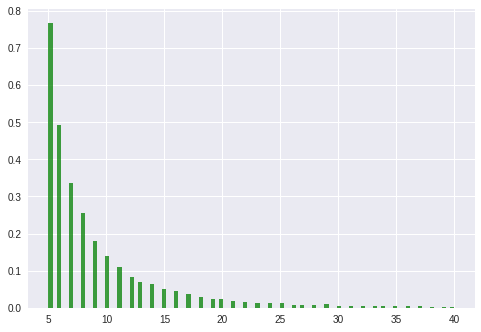

In [19]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
userLog_freq_user = userLog_freq_user.loc[userLog_freq_user <= 40 ]
userLog_freq_user = userLog_freq_user.loc[userLog_freq_user >= 5 ]
userLog_freq_user_np = np.array(userLog_freq_user.values)

n, bins, patches = plt.hist(userLog_freq_user_np, 100, density=True, facecolor='g', alpha=0.75)
plt.show()

userLog = userLog.loc[userLog['userCode'].isin(userLog_freq_user.index)]

<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
  <code>

userLog_freq_user = userLog_freq_user.loc[userLog_freq_user <= 40 ]
userLog_freq_user = userLog_freq_user.loc[userLog_freq_user >= 5 ]
userLog_freq_user_np = np.array(userLog_freq_user.values)

n, bins, patches = plt.hist(userLog_freq_user_np, 100, density=True, facecolor='g', alpha=0.75)
plt.show()

userLog = userLog.loc[userLog['userCode'].isin(userLog_freq_user.index)]
  </code>
  </pre>
</details>



#optional 

พวกเราสามารถ filter ข้อมูลด้วย จำนวนการ เข้าดูในแต่ละวันได้หรือไม่



In [0]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################

------

## TODO#11:

เราจะสร้าง recommendation system โดยจะแบ่งข้อมูลจาก โดยให้ข้อมูลในสัปดาห์สุดท้ายนั้น เป็นตรวของ test set ที่เหลือนั้นเป็น train set

In [20]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
userLog_freq_day = pd.crosstab(userLog['userCode'], [userLog['year'], userLog['month'], userLog['day']], rownames =['userCode'], colnames=['year','month','day'])

userLog_freq_day.head()

year                                 2018                             ...     \
month                                   1                             ...  2   
day                                    1  2  3  4  5  6   7  8  9  10 ... 13   
userCode                                                              ...      
0004e7c4-d920-9891-be82-259a684c12cd    0  0  0  0  0  0   0  0  0  0 ...  0   
000a0872-72e2-b1b9-bfe3-3b9e173c516b    0  0  0  0  0  0   0  0  0  0 ...  0   
0010f747-c339-58fc-5a1a-2d2b142d0ef8    0  0  0  0  0  0  10  0  0  0 ...  0   
00111011-ec7f-b5d8-4a2c-ebbe6f939e27    0  0  0  0  0  0   0  0  0  0 ...  0   
0014ce7f-5b12-b752-dd02-4cffd1cecaae    0  0  0  0  0  0   0  0  0  0 ...  0   

year                                                             
month                                                            
day                                  14 15 16 17 18 19 20 21 22  
userCode                                                         
0004e7c4-d920-9891-be82-259a684c12cd  0  0  0  0  0  0  0  0  0  
000a0872-72e2-b1b9-bfe3-3b9e173c516b  0  0  0  0  8  0  0  0  0  
0010f747-c339-58fc-5a1a-2d2b142d0ef8  0  0  0  0  0  0  0  0  0  
00111011-ec7f-b5d8-4a2c-ebbe6f939e27  0  0  0  0  0  0  0  0  0  
0014ce7f-5b12-b752-dd02-4cffd1cecaae  0  0  0  0  0  0  0  0  0  

[5 rows x 53 columns]

<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
userLog_freq_day = pd.crosstab(userLog['userCode'], [userLog['year'], userLog['month'], userLog['day']], rownames =['userCode'], colnames=['year','month','day'])

userLog_freq_day.head()

</code>
</pre>
</details>







In [21]:
userLog_last_week  = userLog.loc[userLog['month'] == 2]
userLog_last_week = userLog_last_week.loc[ userLog_last_week['day'] >=16]
print(userLog_last_week.shape)
print(userLog.shape)
user_freq_last_week = userLog_last_week['userCode'].value_counts()
user_freq_last_week_np = np.array(user_freq_last_week.values)


(22540, 9)
(137784, 9)


In [44]:
userLog_last_week  = userLog.loc[userLog['month'] == 2]
userLog_last_week = userLog_last_week.loc[ userLog_last_week['day'] >=19]
print(userLog_last_week.shape)
print(userLog.shape)
user_freq_last_week = userLog_last_week['userCode'].value_counts()
user_freq_last_week_np = np.array(user_freq_last_week.values)

(13295, 9)
(137784, 9)


In [46]:
userLog_train_week  = userLog.loc[userLog['month'] == 2]
userLog_train_week = userLog_train_week.loc[ userLog_train_week['day'] >=15]
userLog_train_week = userLog_train_week.loc[ userLog_train_week['day'] <19]
print(userLog_train_week.shape)
print(userLog.shape)
user_freq_train_week = userLog_train_week['userCode'].value_counts()
user_freq_train_week_np = np.array(user_freq_train_week.values)

(12135, 9)
(137784, 9)


<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>

userLog_last_week  = userLog.loc[userLog['month'] == 2]
userLog_last_week = userLog_last_week.loc[ userLog_last_week['day'] >=16]
print(userLog_last_week.shape)
print(userLog.shape)
user_freq_last_week = userLog_last_week['userCode'].value_counts()
user_freq_last_week_np = np.array(user_freq_last_week.values)

</code>
</pre>
</details>




------

# split train and test set

พวก เราจะใช้ user ที่มาใช้ในสัปดาห์สุดท้ายเป็น test set

ที่เหลือ เป็น train set

In [0]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
userLog_train = userLog.loc[userLog.index.isin(userLog_train_week.index)]
userLog_test = userLog.loc[userLog.index.isin(userLog_last_week.index)]

<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
userLog_train = userLog.loc[~userLog.index.isin(userLog_last_week.index)]
userLog_test = userLog.loc[userLog.index.isin(userLog_last_week.index)]
</code>
</pre>
</details>



#  สร้าง dataframe ของข้อมูลที่สื่อว่า user แต่ละคน ดู project ไหนบ้าง จาก train set และ test set
## hint : use pd.crosstab

In [48]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
freq_user_seen_proj_train = pd.crosstab(userLog_train['userCode'], userLog_train['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_train_np = np.array(freq_user_seen_proj_train.values)
# print(freq_user_seen_proj_train_np)
print(freq_user_seen_proj_train_np.shape)

freq_user_seen_proj_train.head()

(2338, 1162)


project_id,44,45,133,189,208,228,234,235,253,287,...,9403,9418,9419,9420,9422,9424,9446,9468,9471,9478
userCode,,,,,,,,,,,,,,,,,,,,,
000a0872-72e2-b1b9-bfe3-3b9e173c516b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0016878a-2b0e-647a-efa1-772fc5873c7d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001efb31-8833-bb1a-b2b3-8e3af720e7f7,0,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0035bcd3-d7c5-1362-3c47-638c3567a370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003e4075-3058-b8db-915c-c2bdefa3d11a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
freq_user_seen_proj_train = pd.crosstab(userLog_train['userCode'], userLog_train['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_train_np = np.array(freq_user_seen_proj_train.values)
#print(freq_user_seen_proj_train_np)
print(freq_user_seen_proj_train_np.shape)

freq_user_seen_proj_train.head()
</code>
</pre>
</details>



In [49]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
freq_user_seen_proj_test = pd.crosstab(userLog_test['userCode'], userLog_test['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_test_np = np.array(freq_user_seen_proj_test.values)
# print(freq_user_seen_proj_test_np)
print(freq_user_seen_proj_test_np.shape)

freq_user_seen_proj_test.head()

(2275, 1190)


project_id,44,156,228,234,235,253,287,291,314,459,...,9420,9422,9424,9446,9471,9478,9483,9484,9491,9493
userCode,,,,,,,,,,,,,,,,,,,,,
0018fd5f-213f-c9ab-ebf4-0dcfb63be43b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0043d7c2-595d-62c3-a437-2024626763f4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0054ebaa-c2c3-590f-4f97-d2df57e64770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0066d2b6-9b4f-db2c-39be-f24251e4ca9f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0086cb61-9a96-dd75-c746-5b63171fef55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
freq_user_seen_proj_test = pd.crosstab(userLog_test['userCode'], userLog_test['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_test_np = np.array(freq_user_seen_proj_test.values)
#print(freq_user_seen_proj_test_np)
print(freq_user_seen_proj_test_np.shape)

freq_user_seen_proj_test.head()
</code>
</pre>
</details>



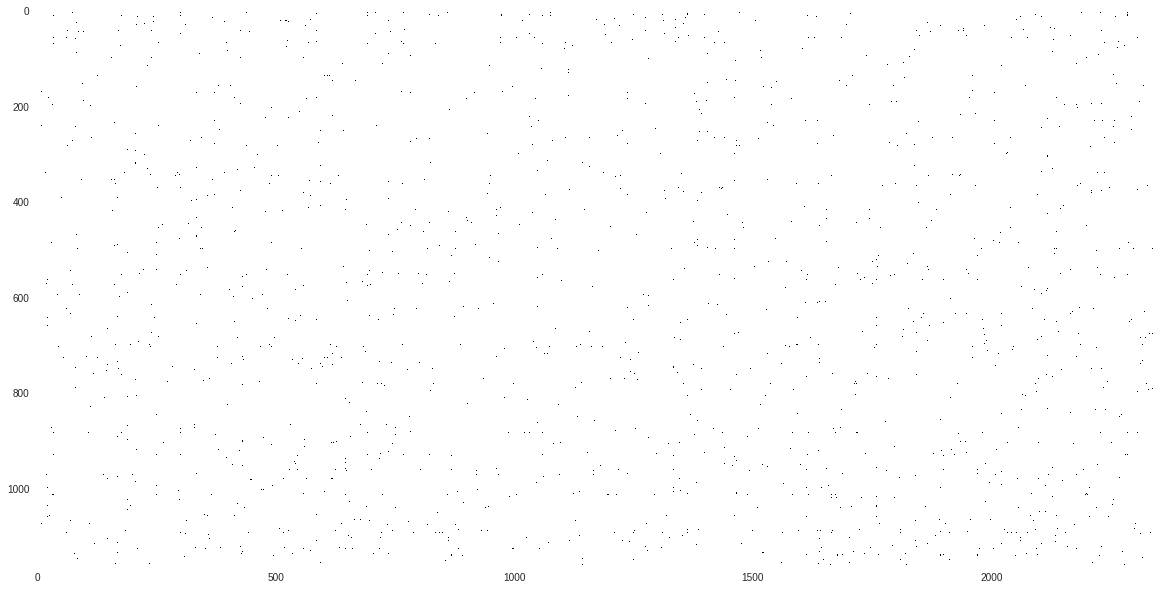

In [50]:
items = freq_user_seen_proj_train.values
plt.figure(figsize=(20,20))
plt.imshow(items.T,vmin=0, vmax=1)
plt.show()

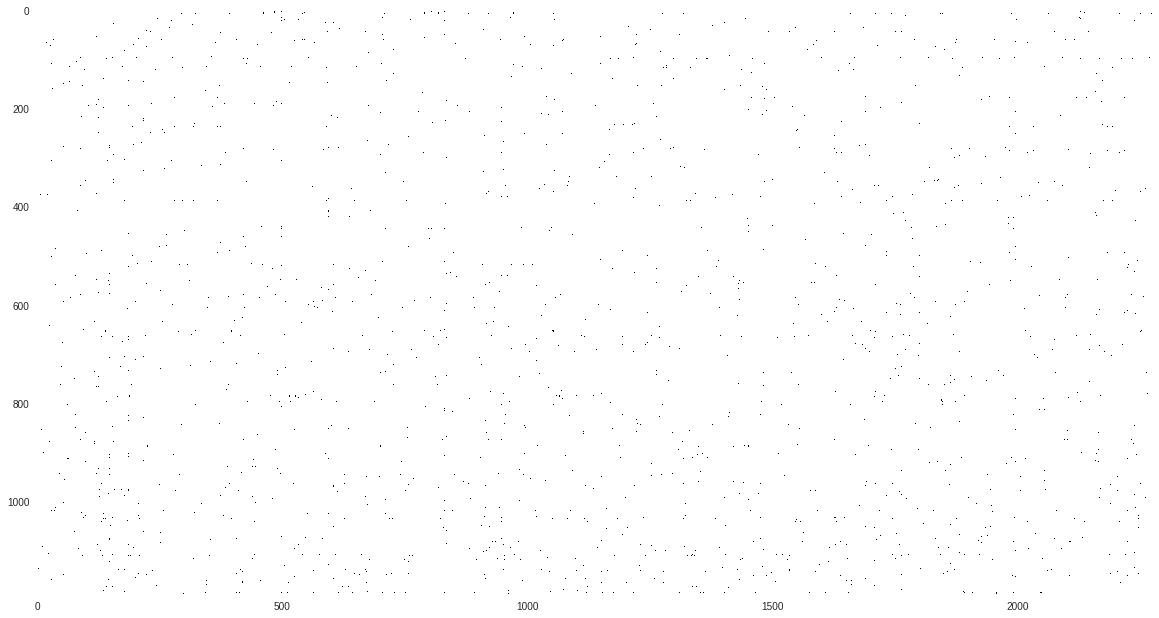

In [51]:
items_t = freq_user_seen_proj_test.values
plt.figure(figsize=(20,20))
plt.imshow(items_t.T,vmin=0, vmax=1)
plt.show()


# TODO#11:  function to normalize data


In [0]:
def normalize(x):
  ################################## #############################################
  #                            WRITE YOUR CODE BELOW                             #
  ################################################################################
  return
def normalize(x):
  x_min = np.min(x,axis = 0)
  x_max = np.max(x,axis = 0)
  x_nor = (x - x_min)/ (x_max - x_min)
  return x_nor;

<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
def normalize(x):
  x_min = np.min(x,axis = 0)
  x_max = np.max(x,axis = 0)
  x_nor = (x - x_min)/ (x_max - x_min)
  return x_nor;
</code>
</pre>
</details>



# recommendation system
พวกเราจะสร้าง recomentation sys โดยเราจะใช้ NNในการสร้างขึ้นมา

[Nearest Neighbors example](https://scikit-learn.org/stable/modules/neighbors.html)




In [0]:
# recommentdation system
def feature_sel(userLog_data_frame,user_code):
  ################################## #############################################
  #                            WRITE YOUR CODE BELOW                             #
  ################################################################################

  return
def feature_sel(userLog_data_frame,user_code):
  np_data = np.zeros((user_code.shape[0], 3 + project_facility_table.shape[1]))

  for i in np.arange(user_code.shape[0]):
    user_sel = user_code[i]
    #print(user_sel)
    userLog_dataF_sel = userLog_data_frame.loc[userLog_data_frame['userCode'] == user_sel]
    proj_id_sel = userLog_dataF_sel['project_id'].values
    input_np_data = np.zeros((proj_id_sel.shape[0],3 + project_facility_table.shape[1]))
    # print(proj_id_sel)
    for j in np.arange(proj_id_sel.shape[0]):
      user_proj_far = project_facility_table.loc[project_facility_table.index == proj_id_sel[j]]
      user_proj_main = project_main.loc[project_main['project_id'] == proj_id_sel[j]]
      input_np_data[j,:] = np.hstack(( np.array(user_proj_main[["lat","lon","starting_price"]].values) ,  np.array(user_proj_far.values) ))
    np_data[i,:] = np.mean(input_np_data,axis=0)
  return np_data;

<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
def feature_sel(userLog_data_frame,user_code):
  np_data = np.zeros((user_code.shape[0], 3 + project_facility_table.shape[1]))
  
  for i in np.arange(user_code.shape[0]):
    user_sel = user_code[i]
    #print(user_sel)
    userLog_dataF_sel = userLog_data_frame.loc[userLog_data_frame['userCode'] == user_sel]
    proj_id_sel = userLog_dataF_sel['project_id'].values
    input_np_data = np.zeros((proj_id_sel.shape[0],3 + project_facility_table.shape[1]))
    # print(proj_id_sel)
    for j in np.arange(proj_id_sel.shape[0]):
      user_proj_far = project_facility_table.loc[project_facility_table.index == proj_id_sel[j]]
      user_proj_main = project_main.loc[project_main['project_id'] == proj_id_sel[j]]
      input_np_data[j,:] = np.hstack(( np.array(user_proj_main[["lat","lon","starting_price"]].values) ,  np.array(user_proj_far.values) ))
    np_data[i,:] = np.mean(input_np_data,axis=0)
  return np_data;
</code>
</pre>
</details>




# TODO#11: 

run example จาก feature ที่เรากำหนด ขึ้นจากหัวข้อด้านบน



In [60]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
project_main_np_data_nor = feature_sel(userLog_train,freq_user_seen_proj_train.index)
#project_main_np_data_nor = normalize(project_main_np_data_nor)
print(project_main_np_data_nor.shape)
project_main_np_data_nor


(2338, 9)


array([[1.37550369e+01, 1.00566334e+02, 3.93500000e+06, ...,
        1.00000000e+00, 1.00000000e+00, 2.50000000e-01],
       [1.36507804e+01, 1.00640633e+02, 3.41500000e+06, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [1.37862810e+01, 1.00746338e+02, 3.94700000e+06, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.38505535e+01, 1.00637731e+02, 1.89000000e+06, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.38991111e+01, 1.00628201e+02, 4.21777778e+06, ...,
        4.44444444e-01, 1.00000000e+00, 4.44444444e-01],
       [1.38983116e+01, 1.00707718e+02, 4.79000000e+06, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [61]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
project_main_np_data_nor_test = feature_sel(userLog_test,freq_user_seen_proj_test.index)
#project_main_np_data_nor = normalize(project_main_np_data_nor)
print(project_main_np_data_nor_test.shape)
project_main_np_data_nor_test

(2275, 9)


array([[1.38591081e+01, 1.00848273e+02, 1.85000000e+06, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.37397087e+01, 1.00703195e+02, 3.37600000e+06, ...,
        4.00000000e-01, 1.00000000e+00, 4.00000000e-01],
       [1.37869170e+01, 1.00635227e+02, 3.99000000e+06, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.36354070e+01, 1.00444400e+02, 2.09900000e+06, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.36899350e+01, 1.00641862e+02, 5.83000000e+06, ...,
        3.33333333e-01, 1.00000000e+00, 0.00000000e+00],
       [1.37124650e+01, 1.00365832e+02, 9.99000000e+06, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [0]:
nbrs_proj = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(project_main_np_data_nor)
# print(project_main_np_data_nor)

distances, indices = nbrs_proj.kneighbors(project_main_np_data_nor_test)

In [80]:
print(indices)
print(indices.shape)

[[1500  574  304 1103 1070]
 [ 270 1272  414 1799  624]
 [1102 2293 1974 1340 2013]
 ...
 [  20 2286 2027 1066  966]
 [2042 1893 2159 2173 1114]
 [1491  187 2064  298   79]]
(2275, 5)


<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
project_main_np_data_nor = feature_sel(userLog_train,freq_user_seen_proj_train.index)
project_main_np_data_nor = normalize(project_main_np_data_nor)
print(project_main_np_data_nor.shape)

nbrs_proj = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(project_main_np_data_nor)
# print(project_main_np_data_nor)

distances, indices = nbrs_proj.kneighbors(project_main_np_data_nor)
</code>
</pre>
</details>



ลองสรา้ง  recommendation system จาก การดูของ user ว่า ใกล้เคียง กับ user คนไหนบ้าง และ recommend ตาม porj ที่ไม่ได้ดู

แต่การสร้าง user ขึ้นมา ข้อมูลที่มีนั้นใหญ่เกินไปที่เราจะประมวลผลได้ ดังนั้น เราต้องเลือก user มา top 1000 มาเป็น example ที่เลือก recommend

In [0]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################


<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
  <code>
  freq_user_seen_proj_train_nor = normalize(freq_user_seen_proj_train_np) 
  nbrs_user_numberical = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(freq_user_seen_proj_train_nor) 
  distances, indices = nbrs_user_numberical.kneighbors(freq_user_seen_proj_train_nor)
  </code>
  </pre>
</details>




เปลี่ยนเป็นข้อมูลว่าแต่ละคนดูอะไรบ้าง และใช้ jaccard เป็น distance (ข้อมูลในการวัดแบบ jaccard ต้องเป็น boolean) [distance function](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric)

In [0]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################



<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
nbrs_user = NearestNeighbors(n_neighbors= 6, algorithm='auto',metric='jaccard' ).fit(freq_user_seen_proj_train_np >= 1)
distances, indices = nbrs_user.kneighbors(freq_user_seen_proj_train_np >= 1)
</code>
</pre>
</details>




แสดงผลการ recommendation โดยดูจากผลลัพธ์ว่าใกล้เคียงอย่างไรบ้าง

In [0]:
################################## #############################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################

# evaluation 

ในการ recommendation จริงๆนั้นมีการ วัดผลการ recommend โดยใช้รูปแบบนี้เป็นหลักลองแสดงการวัดผลโดยใช้ matrix นี่ดู [Mean Average Precision](http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html?fbclid=IwAR2UOfz0a_2Ig60aQ2HszgZq63nch96Hbzod2q54kDZRZT_mPzdsxJXyPj0)

การวัดผล recommendation system เราจะดูจาก project ที่เขาได้ ดูตัวใหม่เท่านั้น

เราจะใช้ function ตัวล่างเพื่อตรวจสอบการวัดผล

1.   proj_seen : ตัวสร้าง dict ของ project ที่ user ดู
    *   data_freq_seen (input) : df ของความถี่ที่ user ดูแต่ละ project ex.freq_user_seen_proj_train, freq_user_seen_proj_test
    *   output : dict ของ project ที่ user ดู
2.   index_to_usercode : ตัวสร้าง dictonary ของ  Nearest Neighbors
    *   nn_index (input) : ผลลัพธ์จากการ run Nearest Neighbors (ค่า indices ที่เป็น output ของ NearestNeighbors.kneighbors)
    *   user_code_list (input) : ค่า freq_user_seen_proj_train.index
    *   output :  dict ของ  Nearest Neighbors ว่า user ไหนใกล้กับคนไหนเป็นอันดับ
3.   proj_recommend : ตัวสร้างว่าเราควร recommend ตัวไหน
    *   nn_dict (input) : output ของ proj_seen
    *   dict_seen_train (input) : output ของ proj_seen
    *   output : dict ของ การ recommend แต่ละ user (ยังไม่ตัดตัวซ้ำ)
4.   proj_repeat : ตัดตัวซ้ำ (project ที่ userเคยดูไปแล้ว)
    *   dict_train (input) : dict การดูของuser ที่ช้ train model 
    *   dict_test (input) : dict การดูของ user ที่ใช้ test หรือ recommend (มีตัวซ้ำกับ dict_train)
    *   output : dict_test ที่ตัดค่าซ้ำใน dict_train
5.   mean_average_precision : ตัวหาค่า map at k 
    *   dict_recomment (input) : dict ที่ต้องการ recommend (ที่ตัดตัวซ้ำออก)
    *   dict_test (input) : dict นำมา test การ recommend (ที่ตัดตัวซ้ำออก)
    *   k (input) : จำนวนมากสุด ที่ จะ recommend
    *   output : ค่า map at K


In [0]:
def proj_recommend(nn_index, data_seen_train, data_seen_test):
  output_list = {}
  all_columns = data_seen_train.columns
  test_index = data_seen_test.index
  #print(all_columns,len(all_columns))
  #print(len(test_index))
  for i in range(len(test_index)):
    list_proj = set()
    for j in range(nn_index.shape[1]):
      #print(nn_index[j])
      #print(data_seen_train.iloc[nn_index[j]])
      np_array = np.array(data_seen_train.iloc[nn_index[i,j]])
      #print(np_array.sum())
      #print(np_array.size)
      list_proj = list_proj.union(set(all_columns[np_array > 0].values))
    output_list[test_index[i]] = list(list_proj)
  return output_list

####################################################################

def proj_repeat(dict_train,dict_test):
  dict_out = {} 
  for user_code in dict_test:
    dict_out[user_code] = list()
    if user_code in dict_train:
      list_proj_train = np.array(dict_train[user_code])
      list_proj_test = np.array(dict_test[user_code])
      bool_list = np.isin(list_proj_test ,list_proj_train)
      dict_out[user_code] = list(list_proj_test[bool_list])
  return dict_out

####################################################################

def proj_seen(data_freq_seen):
  all_colums = data_freq_seen.columns
  all_index = data_freq_seen.index
  output_list = {}
  for index in np.arange(len(all_index)):
    np_array = np.array(data_freq_seen.iloc[index])
    output_list[all_index[index]] = all_colums[np_array > 0].values
  return output_list

####################################################################

def mean_average_precision(dict_recomment,dict_test,k):
  list_map_at_k = []
  for user_code in dict_test:
    #print(user_code)
    list_map_at_k_user_i = []
    list_proj_rec = np.array(dict_recomment[user_code])
    list_proj_test = np.array(dict_test[user_code])
    
    ##########
    
    for i in np.arange(k):
      if(i == len(list_proj_rec) or len(list_proj_test) == 0 or len(list_proj_rec) == 0):
        break
      bool_list = np.isin(list_proj_rec[0:i+1],list_proj_test)
      list_map_at_k_user_i.append(np.sum(bool_list)/(i+1))
    
    # If we fail to recommend anything, give 0.
    if len(list_map_at_k_user_i) == 0:
      list_map_at_k_user_i = [0]
    
    ##########

    number = np.mean(np.array(list_map_at_k_user_i))
    
    if(~np.isnan(number)):
      list_map_at_k.append(number)

  return np.mean(np.array(list_map_at_k))

# ตรวจดูคำตอบ NN

# example evaluation

In [157]:
dict_user_test = proj_seen(freq_user_seen_proj_test)
dict_user_train = proj_seen(freq_user_seen_proj_train)
dict_user_test = proj_repeat(dict_user_train,dict_user_test)

dict_user_rec = proj_recommend(indices, freq_user_seen_proj_train, freq_user_seen_proj_test)
dict_user_rec = proj_repeat(dict_user_train,dict_user_rec)

#################################################################

k = 3
map_k = mean_average_precision(dict_user_rec,dict_user_test,k)
print('Your result : ', map_k)

Your result :  0.08235653235653236


------
